# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [9]:
model.add(Dropout(0.5))

In [10]:
model.add(Dense(units=1000,
                kernel_initializer="normal",
                activation='relu'))

In [11]:
model.add(Dropout(0.5))

In [13]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 16s - loss: 0.3637 - acc: 0.8863 - val_loss: 0.1317 - val_acc: 0.9618
Epoch 2/10
 - 16s - loss: 0.1589 - acc: 0.9511 - val_loss: 0.0978 - val_acc: 0.9705
Epoch 3/10
 - 15s - loss: 0.1173 - acc: 0.9636 - val_loss: 0.0895 - val_acc: 0.9731
Epoch 4/10
 - 15s - loss: 0.0990 - acc: 0.9700 - val_loss: 0.0845 - val_acc: 0.9743
Epoch 5/10
 - 15s - loss: 0.0839 - acc: 0.9735 - val_loss: 0.0778 - val_acc: 0.9770
Epoch 6/10
 - 16s - loss: 0.0741 - acc: 0.9771 - val_loss: 0.0773 - val_acc: 0.9765
Epoch 7/10
 - 16s - loss: 0.0658 - acc: 0.9783 - val_loss: 0.0755 - val_acc: 0.9779
Epoch 8/10
 - 16s - loss: 0.0620 - acc: 0.9799 - val_loss: 0.0762 - val_acc: 0.9780
Epoch 9/10
 - 16s - loss: 0.0570 - acc: 0.9809 - val_loss: 0.0746 - val_acc: 0.9798
Epoch 10/10
 - 15s - loss: 0.0528 - acc: 0.9830 - val_loss: 0.0802 - val_acc: 0.9786


# 以圖形顯示訓練過程

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

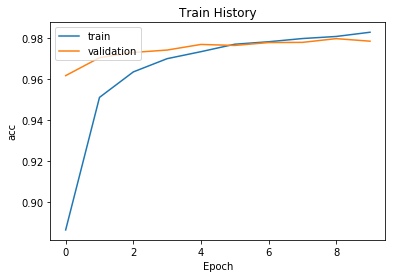

In [18]:
show_train_history(train_history,'acc','val_acc')

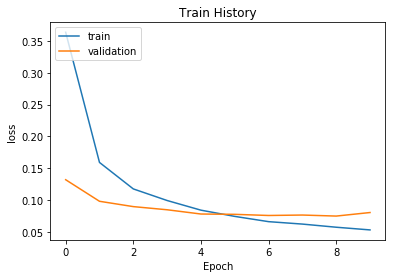

In [19]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 144us/step

accuracy= 0.9793


# 進行預測

In [21]:
prediction=model.predict_classes(x_Test)

In [22]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

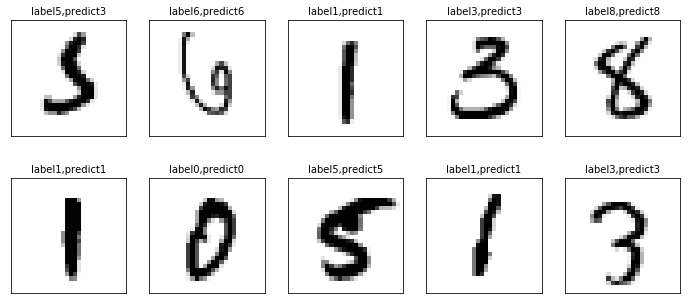

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [25]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,1,2,1,0,1,3,1,1,0
1,0,1130,3,0,0,0,2,0,0,0
2,1,0,1021,1,1,0,1,5,2,0
3,1,0,7,992,0,2,0,3,3,2
4,2,2,2,0,967,0,4,0,0,5
5,2,0,0,12,2,861,4,1,5,5
6,4,2,0,1,3,3,945,0,0,0
7,1,11,9,1,1,0,0,992,3,10
8,4,0,11,11,4,9,2,3,926,4


In [26]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [27]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2291,5,3
2597,5,3
2810,5,3
4355,5,3
4360,5,3
5937,5,3


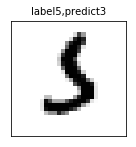

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

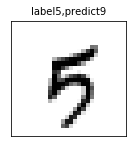

In [29]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)